# Film Industry Analysis for New Studio Strategy

## 1. Business Understanding

This project is aimed to help start a new movie studio and to anyone who is interested with the movie industry that will play as a huge competitive player with the big companies. As big companies increasingly invest in original content, the entertainment landscape is rapidly evolving and its time we evolve with it. Through this project you get to learn all about the movie industry and the growing curve towards a successfull movie studio from do's to dont's. However, with little to no prior experience in filmaking, it is crucial that we rely on data-driven insights to make informed strategic decisions from a few sources we gathered such im.db etc. At the end of this project you will get to know all about the movie industry and be able to start one..


## 2. Data Understanding
### 2.1 Data Source
The data used in this project comes from two main sources:

1) **Box Office Mojo (bom.movie_gross.csv)**
This is a compressed CSV file containing box office performance data for a wide range of films. It includes both domestic and international gross earnings by year and studio.

2) **IMDb SQLite Database (im.db.zip)**
This is a zipped SQLite database that contains metadata and user rating information for movies. The relevant tables, `movie_basics` and `movie_ratings`, were merged to support deeper insights.

3) **The Numbers Table (tn.movie_budget.csv)**
This dataset provides detailed financial performance metrics for films, especially focusing on production costs and box office returns.

### Reasons why this Data is sufficient for Analysis
These data sources are appropriate for analyzing the business problem because they combine **financial performance metrics** with **audience and film metadata**. This allows us to identify trends in what types of films are both commercially successful and well-received by viewers—critical insights for a company looking to make informed decisions about the kinds of films their new studio should produce.



### 2.2 Initial Data Exploration
In this section, we import our data from the various sources into our workspace for exploration of it's initial properties

In [1]:
# Let's do all of our imports
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt


print('Finished Importing Succesfully')

Finished Importing Succesfully


In [2]:
# First, we connect to the 'ím.db' database using SQLite
conn = sqlite3.connect('Data_Folder/im.db/im.db')

##### 1. Overview of 'movie _ratings'

In [3]:
# Let's query the table from the database and store it in a dataframe
query1 = """
    SELECT *
    FROM movie_ratings
"""
df_1 = pd.read_sql_query(query1, conn)

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_1.shape)
print('\nFirst 5 rows:')
display(df_1.head())
print('\nOverall Information:')
df_1.info()
print('\nSummary Description:')
display(df_1.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_1.isnull().sum()


Shape of the Dataset:


(73856, 3)


First 5 rows:


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB

Summary Description:


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06



Missing Values in Each Column:


movie_id         0
averagerating    0
numvotes         0
dtype: int64

##### 2. Overview of 'movie_basics'

In [4]:
# Let's query the table from the database and store it in a dataframe
query2 = """
    SELECT *
    FROM movie_basics
"""
df_2 = pd.read_sql_query(query2, conn)

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_2.shape)
print('\nFirst 5 rows:')
display(df_2.head())
print('\nOverall Information:')
df_2.info()
print('\nSummary Description:')
display(df_2.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_2.isnull().sum()


Shape of the Dataset:


(146144, 6)


First 5 rows:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB

Summary Description:


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000



Missing Values in Each Column:


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

##### 3. Overview of 'Data_Folder/bom.movie_gross.csv'

In [5]:
# Let's load the csv file into a pandas dataframe
df_3 = pd.read_csv('Data_Folder/bom.movie_gross.csv')

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_3.shape)
print('\nFirst 5 rows:')
display(df_3.head())
print('\nOverall Information:')
df_3.info()
print('\nSummary Description:')
display(df_3.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_3.isnull().sum()


Shape of the Dataset:


(3387, 5)


First 5 rows:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

Summary Description:


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000



Missing Values in Each Column:


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#### 4. Overview of merged 'movie_ratings' and 'movie_basics'
The 2 tables from the 'im.db' database can be joined on the 'movie_id' column. However, we lose half the records from the 'movie basics' table by joining.Therefore, we will still have to perform seperate analysis on it even after analysing the merged table to preserve the richness of the data.

In [6]:
# Let's perform an inner join on the 2 tables
df_merged = pd.merge(df_1, df_2, on = 'movie_id', how = 'inner')

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_merged.shape)
print('\nFirst 5 rows:')
display(df_merged.head())
print('\nOverall Information:')
df_merged.info()
print('\nSummary Description:')
display(df_merged.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_merged.isnull().sum()


Shape of the Dataset:


(73856, 8)


First 5 rows:


,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB

Summary Description:


,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000



Missing Values in Each Column:


movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

### 5. Overview of `tn.movie_budget.csv`

In [7]:
# Reload and check columns again
df_4 = pd.read_csv('Data_Folder/tn.movie_budgets.csv')

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_4.shape)
print('\nFirst 5 rows:')
display(df_4.head())
print('\nOverall Information:')
df_4.info()
print('\nSummary Description:')
display(df_4.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_4.isnull().sum()



Shape of the Dataset:


(5782, 6)


First 5 rows:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB

Summary Description:


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000



Missing Values in Each Column:


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### 2.3 Feature Understanding and Documentation
To support the analysis of film performance and guide our studio’s content strategy, we use features from two datasets: `bom.movie_gross.csv.gz` (Box Office Mojo) and a merged table from `movie_basics` and `movie_ratings` in `im.db` (IMDb metadata and ratings). Below is a breakdown of the features in each dataset.

#### 1. `bom.movie_gross.csv.gz`
This dataset provides financial performance data for films.
- **Identification :**
    - *title*: The name of the film (string)
- **Production :**
    - *studio*: The production or distribution studio responsible for the film (string).
- **Finanicial Metrics :**
    - *domestic_gross*: Total box office revenue earned in the domestic (U.S.) market
    - *foreign_gross*: Total box office revenue earned in international markets *(integer or float)*.

#### 2. IMDb Merged Table: `movie_basic` + `movie_ratings`
This dataset provides financial performance data for films.
- **Identification :**
    - *movie_id*: A unique identifier for each film(string)
- **Titles :**
    - *primary_title* : The title most commonly used(string).
    - *original_title* : The title most commonly used(string).
- **Time :**
    - *start_year*: The year the film was first released
- **Content Characteristics :**
    - *runtime_minutes* : The duration of the film in minutes
    - *genres* : The genre or genres associated with the film.
- **Audience Feedback :**
    - *averagerating* : The average IMDb user rating for the film
    - *numvotes* : The total number of IMDb users who rated the film

These features provide a holistic view of each film by combining:
- **Box office success** (via revenue and studio info),
- **Descriptive and categorical characteristics** (like genre and runtime),
- **Audience sentiment** (via ratings and vote counts), and
- **Temporal context** (release year).

#### 3. The Numbers Table: `tn.movie_budgets.csv`
This dataset provides detailed financial performance metrics for films, especially focusing on production costs and box office returns.
- **Identification:**
    - *id*: A unique identifier for each movie entry (string).
- **Titles:**
    - *movie*: The name/title of the film (string).
- **Time:**
    - *release_date*: The official release date of the film (date format).
- **Financial Performance:**
    - *production_budget*: The amount spent to produce the movie (numeric, in USD).
    - *domestic_gross*: Total revenue generated in the domestic market (numeric, in USD).
    - *worldwide_gross*: Total revenue generated globally, including domestic earnings (numeric, in USD).


### 2.4 Initial Data Visualisations
We made some visualisations to have a better feel of the data and it's underlying patterns

#### 2.4.1 Box Office Mojo: `bom.movie_gross.csv.gz`

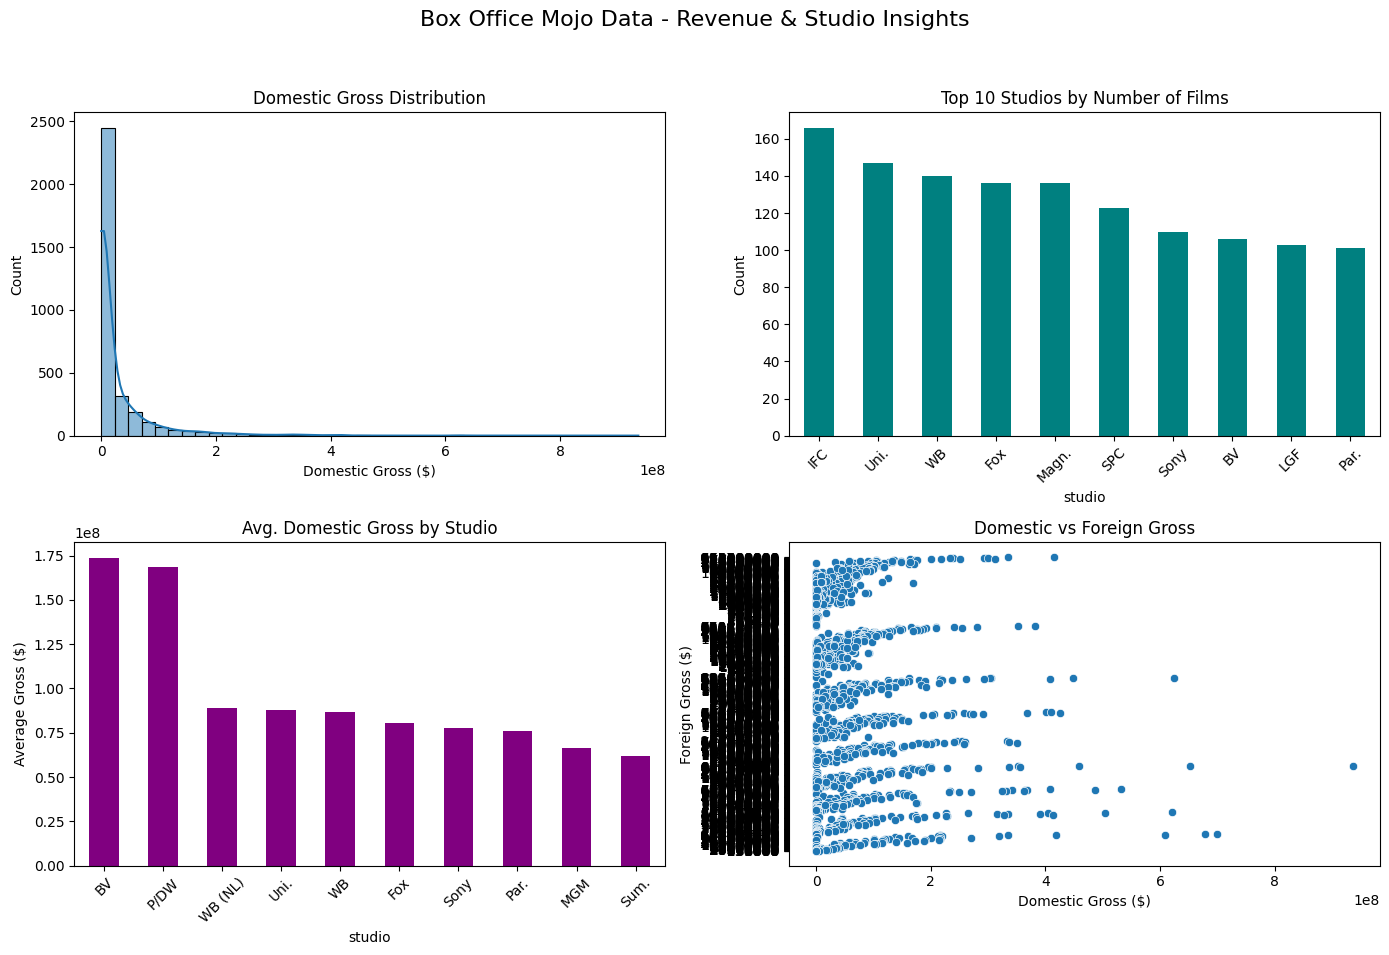

In [8]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Box Office Mojo Data - Revenue & Studio Insights", fontsize=16)

# 1. Domestic Gross Distribution
sns.histplot(df_3['domestic_gross'], bins=40, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Domestic Gross Distribution")
axes[0, 0].set_xlabel("Domestic Gross ($)")

# 2. Top 10 Studios by Count
df_3['studio'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1], color='teal')
axes[0, 1].set_title("Top 10 Studios by Number of Films")
axes[0, 1].set_ylabel("Count")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Average Domestic Gross by Studio (Top 10)
df_3.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title("Avg. Domestic Gross by Studio")
axes[1, 0].set_ylabel("Average Gross ($)")
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Domestic vs. Foreign Gross
sns.scatterplot(x='domestic_gross', y='foreign_gross', data=df_3, ax=axes[1, 1])
axes[1, 1].set_title("Domestic vs Foreign Gross")
axes[1, 1].set_xlabel("Domestic Gross ($)")
axes[1, 1].set_ylabel("Foreign Gross ($)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Insights from the Visualisations

1. **Domestic Gross Distribution (**Top Left**)**
- **Observation:** Most films earn less than $50 million domestically, with a long tail of very high earners.
- **Insight:** The box office is highly skewed—only a small number of films become blockbusters.
- **Implication:** Relying on one massive hit is risky. The studio should diversify its portfolio by producing mid-budget films with high ROI potential rather than chasing only big-budget blockbusters.

2. **Top 10 Studios by Number of Films (**Top Right**)**
- **Observation:** IFC, Universal (Uni.), WB, and Fox have the highest number of released films.
- **Insight:** These studios succeed partly by producing high volumes of content, often across various genres and budgets.
- **Implication:** A new studio can learn from this strategy by establishing a pipeline of consistent releases to build presence—but it should first focus on quality and market differentiation before scaling up.

3. **Avg. Domestic Gross by Studio (**Bottom Left**)**
- **Observation:** Buena Vista (Bv), Pixar/Disney (P/DW), and Warner Bros. (WB) top the list with the highest average grosses.
- **Insight:** Studios tied to major franchises or brands (e.g., Disney/Pixar) yield higher per-film returns.
- **Implication:** A new studio should explore building or licensing original IPs or franchise-like storytelling elements to boost per-film earnings over time, even if starting small.

4. **Domestic vs. Foreign Gross (**Bottom Right**)**
- **Observation:** There’s a loose positive trend—films with high domestic earnings tend to perform well internationally, though with many exceptions.
- **Insight:** Some films clearly overperform in either the domestic or international market, suggesting differing audience tastes.
- **Implication:** The studio should plan with global markets in mind from the start—incorporating universal themes, minimal cultural localization requirements, and strong visual storytelling to maximize global revenue.


#### 2.4.2 IMDb Merged Table: `movie_basic` + `movie_ratings`

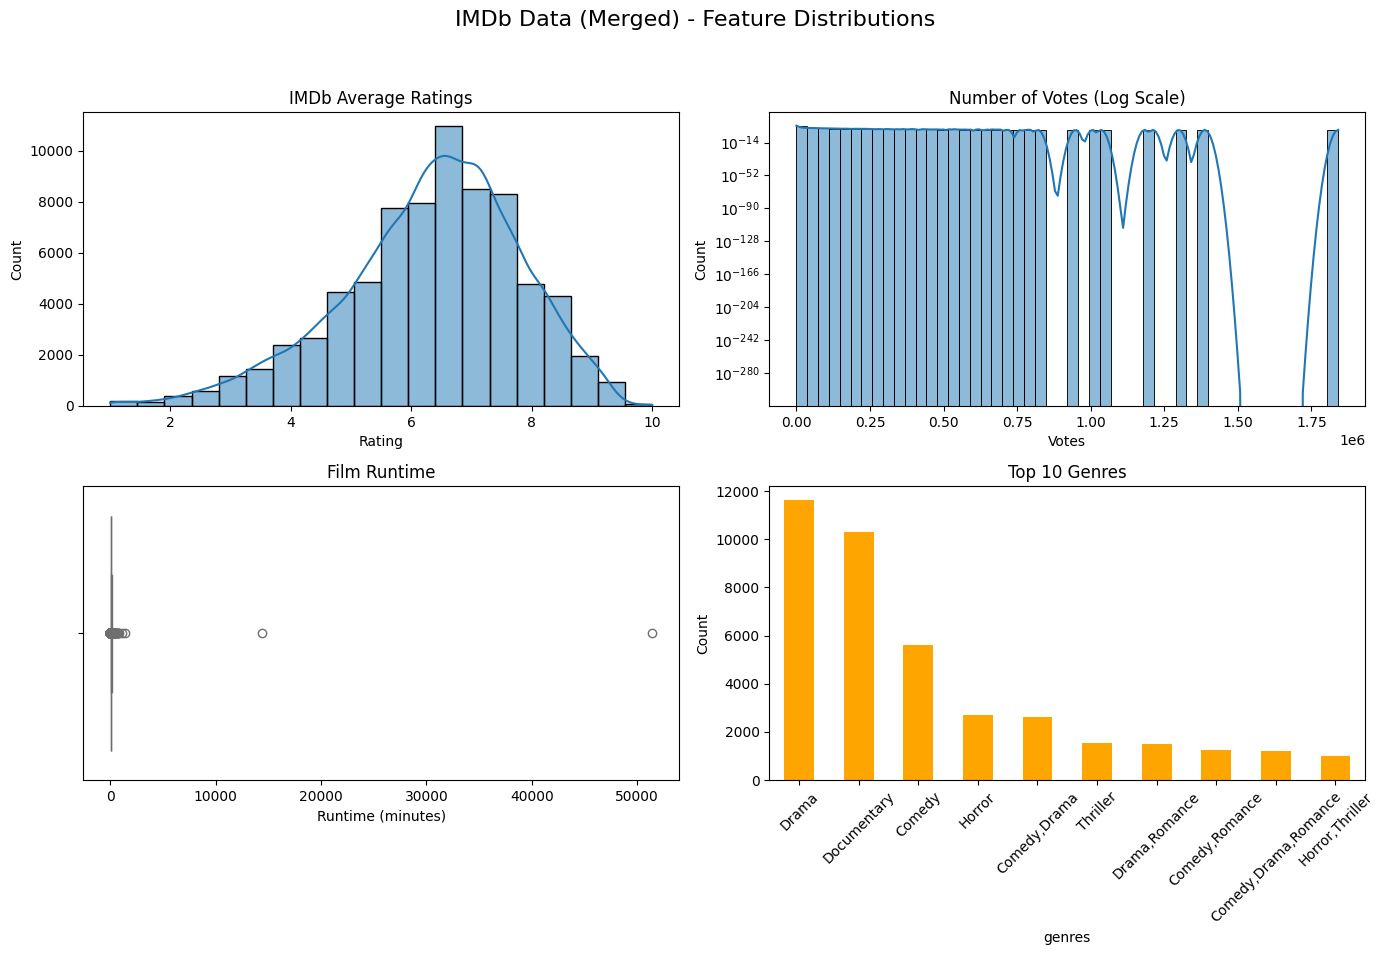

In [9]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("IMDb Data (Merged) - Feature Distributions", fontsize=16)

# 1. Average Rating Distribution
sns.histplot(df_merged['averagerating'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("IMDb Average Ratings")
axes[0, 0].set_xlabel("Rating")

# 2. Number of Votes Distribution
sns.histplot(df_merged['numvotes'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Number of Votes (Log Scale)")
axes[0, 1].set_xlabel("Votes")
axes[0, 1].set_yscale("log")

# 3. Runtime Distribution
sns.boxplot(x=df_merged['runtime_minutes'], ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title("Film Runtime")
axes[1, 0].set_xlabel("Runtime (minutes)")

# 4. Top 10 Genres by Frequency
df_merged['genres'].value_counts().head(10).plot(kind='bar', ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Top 10 Genres")
axes[1, 1].set_ylabel("Count")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Insights from the Visualisations

1. **IMDb Average Ratings (**Top Left**)**
- **Observation:** Most films cluster around an average rating of 6–7 on IMDb.
- **Insight:** Audience ratings tend to follow a bell curve, with very few films being rated extremely low or high.
- **Implication:** To stand out, the studio must aim for strong storytelling, direction, and casting to push ratings into the 7+ range—crucial for longevity on streaming platforms and word-of-mouth marketing.

2. **Number of Votes (Log Scale) (**Top Right**)**
- **Observation:** The number of user votes is heavily skewed—only a small fraction of films receive a large volume of ratings.
- **Insight:** Popular films get more engagement and visibility, further boosting their success.
- **Implication:** A marketing strategy that encourages early audience engagement and reviews can increase visibility and possibly trigger viral growth.

3. **Film Runtime (**Bottom Left**)**
- **Observation:** Most films run between 80 to 120 minutes, with some outliers extending beyond that.
- **Insight:** Audiences may prefer films of standard length, and longer runtimes do not necessarily guarantee better performance.
- **Implication:** Aim for a runtime within the standard range (90–120 min) to ensure better pacing and audience retention, unless content specifically justifies a longer duration.

4. **Top 10 Genres (**Bottom Right**)**
- **Observation:** Drama, Comedy, and Documentary are the most frequent genres.
- **Insight:** These genres dominate production, likely due to lower costs and broad appeal.
- **Implication:** Entering these genres offers lower risk, but differentiation is key. Alternatively, targeting underrepresented but growing genres (like Sci-Fi or Animation) may unlock niche audiences.


### 2.4.3 The Numbers Table: `tn.movie_budgets.csv`

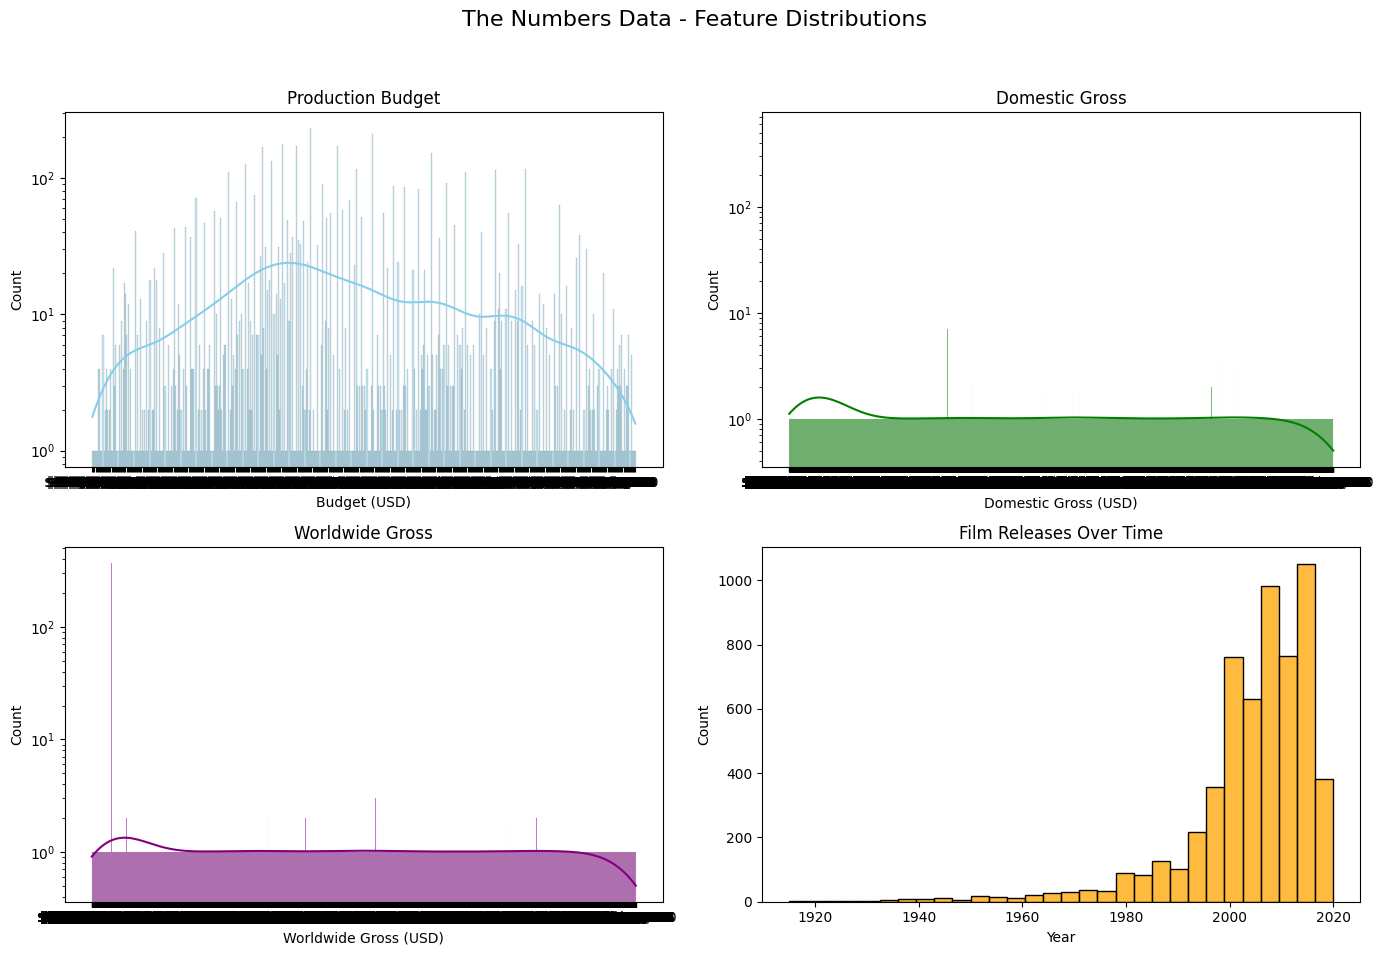

In [10]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("The Numbers Data - Feature Distributions", fontsize=16)

# 1. Production Budget Distribution
sns.histplot(df_4['production_budget'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Production Budget")
axes[0, 0].set_xlabel("Budget (USD)")
axes[0, 0].set_yscale("log")

# 2. Domestic Gross Distribution
sns.histplot(df_4['domestic_gross'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title("Domestic Gross")
axes[0, 1].set_xlabel("Domestic Gross (USD)")
axes[0, 1].set_yscale("log")

# 3. Worldwide Gross Distribution
sns.histplot(df_4['worldwide_gross'], bins=30, kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title("Worldwide Gross")
axes[1, 0].set_xlabel("Worldwide Gross (USD)")
axes[1, 0].set_yscale("log")

# 4. Release Year Distribution
df_4['release_year'] = pd.to_datetime(df_4['release_date'], errors='coerce').dt.year
sns.histplot(df_4['release_year'].dropna(), bins=30, ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Film Releases Over Time")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Insights from the Visualisations

1. **Production Budget Distribution (**Top Left**)**
- **Observation:** Most films have a production budget below $50 million, though a few outliers have significantly higher budgets.
- **Insight:** The film industry tends to invest modestly in the majority of films, with only a select few receiving very high budgets.
- **Implication:** As a new studio, it's more strategic to focus on producing quality content within a controlled budget range. Going after high-budget productions without an established track record could pose high financial risk.

2. **Domestic Gross Distribution (**Top Right**)**
- **Observation:** The majority of films earn modest domestic gross revenue, while a very small number earn significantly more.
- **Insight:** Like production budgets, domestic returns are heavily right-skewed. Most films don't become massive domestic hits.
- **Implication:** The studio should not depend solely on the domestic market for recouping investments. A diversified release strategy that includes digital and international markets could enhance returns.

3. **Worldwide Gross Distribution (**Bottom Left**)**
- **Observation:** Worldwide gross follows a similar skewed pattern, with most films grossing modest amounts globally, but a few earning exceptionally high figures.
- **Insight:** Global blockbusters are rare and hard to predict. However, some films significantly outperform domestically and internationally.
- **Implication:** New studios should consider global distribution opportunities and aim for content that resonates across cultures to improve chances of international success.

4. **Film Releases Over Time (**Bottom Right**)**
- **Observation:** There’s a steady rise in the number of film releases from the 1980s, peaking around 2015–2019.
- **Insight:** The industry has seen a substantial increase in output, especially with the rise of digital platforms and independent studios.
- **Implication:** The studio is entering a saturated market. To stand out, it needs to differentiate through genre focus, innovative storytelling, or targeting niche audiences underserved by mainstream releases.

## 3. Data Preparation

In this section, we prepared three datasets for analysis:

- **`bom_movie_gross.csv`** – Contains box office performance data including domestic and foreign gross revenues.
- **`tn.movie_budgets.csv`** – Provides production budget information alongside domestic and worldwide gross figures.
- **`im.db`** – A SQLite database containing additional metadata about movies, including genre, ratings etc.

The following data cleaning and preparation steps were carried out:

- **Inspection of Dataset Structure**: Reviewed shapes, column names, and data types to understand the structure of each dataset.
- **Handling Missing Values**: Identified and addressed missing values using appropriate techniques such as dropping nulls or imputing where necessary.
- **Data Type Conversion**: Converted monetary columns from strings (with dollar signs and commas) to numeric formats for computation.
- **Date Parsing**: Transformed release date strings into datetime objects and extracted year values for time-based analysis.
- **Duplicate Removal**: Checked for and confirmed the absence of duplicate rows.
- **Profit Calculation**: Created new columns (e.g., `profit`) by subtracting production budgets from gross earnings.
- **Merging datasets** to enrich the data, combining relevant information across files based on common keys such as movie titles and years.
- **Saving Cleaned Data**: Exported cleaned versions of key datasets to CSV files for later use.

These steps ensured a clean and consistent structure across all data sources, allowing for meaningful analysis and visualization.


### 

3.1 Cleaning and Preparing the "bom.movie_gross.csv"

In [11]:
df = pd.read_csv('Data_Folder/bom.movie_gross.csv')

#checking for duplicate rows
duplicate_bool = df.duplicated()
num_duplicates = duplicate_bool.sum()
print(f'\nNumber of duplicate rows: {num_duplicates}')

#display duplicate rows for inspection
if num_duplicates > 0:
    print('\nDuplicate Rows:')
    display(df[duplicate_bool])
else:
    print('\nNo duplicate rows found.')


#Display data types of each column
print('\nData Types of Each Column:')
print(df.dtypes)
#check if any columns have mixed data types
for col in df.columns:
    unique_types = df[col].map(type).unique()
    if len(unique_types) > 1:
        print(f"Warning: Column '{col}' has mixed data types: {unique_types}")


#Checking for missing values
missing_counts = df.isnull().sum()
#Show columns with missing values
missing_columns = missing_counts[missing_counts > 0]
if not missing_columns.empty:
    print('\nColumns with Missing Values and their counts:')
    print(missing_columns)
else:
    print('\nNo missing values found in the dataset.')



Number of duplicate rows: 0

No duplicate rows found.

Data Types of Each Column:
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

Columns with Missing Values and their counts:
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64


3.2 Converitng non-string values in 'studio' to "NaN"

In [12]:
#importing necessary library
import numpy as np

#converitng non-string values in studio column to string
df['studio'] = df['studio'].apply(lambda x: x if isinstance(x, str) else np.nan)

print("unique types in 'studio' after cleaning:")
print(df['studio'].map(type).unique())

#show all non_string values in the 'studio' column
non_strings = df[df['studio'].map(type) != str]
print(non_strings['studio'].unique())




unique types in 'studio' after cleaning:
[<class 'str'> <class 'float'>]
[nan]


3.3 Converting 'foreign_gross' data to float.

In [13]:
#first, remove commas(if any)
df['foreign_gross'] = df['foreign_gross'].replace(',', '', regex=True)
#then convert non-numeric values to NaN
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

#check the new data type
print(df['foreign_gross'].dtype)

float64


3.4 Visualizing missing values with seaborn and matplotlib.

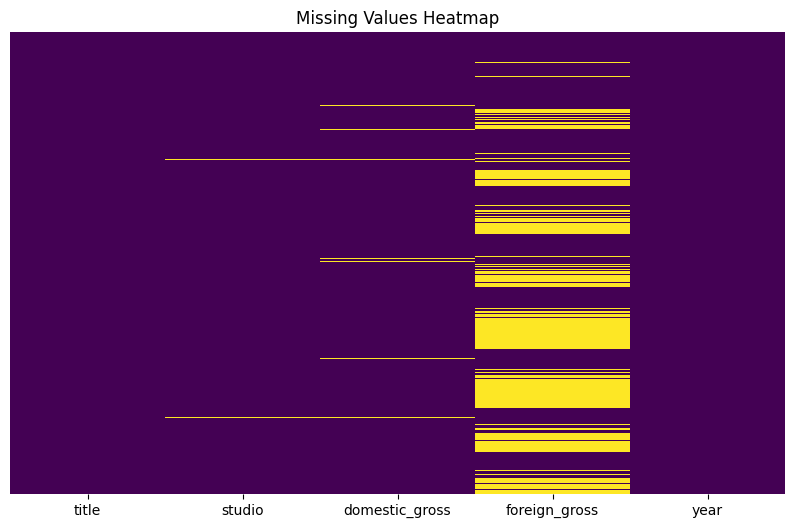

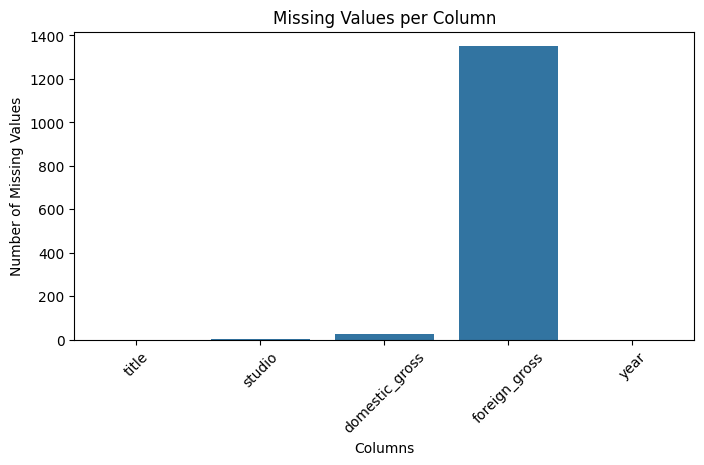

In [14]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#create a boolean dataframe for missing values
missing = df.isnull()

#plotting a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#bar plot of missing values count per column
missing_counts = df.isnull().sum()
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=45)
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

### Missing Values Visualization Summary

To better understand the distribution of missing data in the `bom.movie_gross.csv` dataset, we visualized the missing values using both a **heatmap** and a **bar chart**:

- The **heatmap** clearly highlights rows with missing entries, particularly in the `foreign_gross` column, which has a substantial number of null values.
- The **bar chart** of missing values confirms the numerical summary:
  - `foreign_gross` has the highest number of missing entries (1350), indicating that data for international revenue is often unreported or unavailable.
  - `domestic_gross` has a relatively small number of missing values (28).
  - `studio` has very few missing values (5), which is minimal but should still be handled.
 
These visualizations provide insight into the severity and concentration of missing values. 


3.5 Handling missing data.

In [15]:
#handling missing values in each column
df['studio'] = df['studio'].fillna('Unknown')  # Fill missing studio names with 'Unknown' cause it only has 5 missing values
df['domestic_gross'] = df['domestic_gross'].fillna(0)  # missing values can mean the movie had no domestic gross recorded
df['foreign_gross'] = df['foreign_gross'].fillna(0)  # missing values can mean the movie had no foreign gross recorded

#To confirm no missing values remain.
print("missing values after cleaning:")
print(df[['studio', 'domestic_gross', 'foreign_gross']].isnull().sum())

#saving the cleaned dataframe to a new csv file
df.to_csv('Data_Folder/cleaned_bom_movie_gross.csv', index=False)


missing values after cleaning:
studio            0
domestic_gross    0
foreign_gross     0
dtype: int64


3.6 Data cleaning and preparation for 'im.db' file

3.6.1 Movie_ratings.

In [16]:
#connecting to the database
conn = sqlite3.connect('Data_Folder/im.db/im.db')
#load movie_ratings table from the database
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
# show initialshape of the table
print("initial shape of movie_ratings:",movie_ratings.shape)

# Check for duplicates in the movie_ratings table
duplicates = movie_ratings[movie_ratings.duplicated()]
print(f"nNumber of duplicate rows:{duplicates.shape[0]}")
print("sample duplicate rows:")
print(duplicates.head())

#Check for missing values
missing_values = movie_ratings.isnull().sum()
print("Missing values per column:")
print(missing_values)

#percentage of missing values
missing_percent = (movie_ratings.isnull().sum() / len(movie_ratings)) * 100
print("\npercentage of missing values per column:")
print(missing_percent)

initial shape of movie_ratings: (73856, 3)
nNumber of duplicate rows:0
sample duplicate rows:
Empty DataFrame
Columns: [movie_id, averagerating, numvotes]
Index: []
Missing values per column:
movie_id         0
averagerating    0
numvotes         0
dtype: int64

percentage of missing values per column:
movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64


3.6.2 Movie_basics 

In [17]:
# Load movie_basics table
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Check initial shape
print("Initial shape of movie_basics:", movie_basics.shape)

# Check for duplicates
duplicates = movie_basics[movie_basics.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Check missing values
missing_values = movie_basics.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Percentage of missing values
missing_percent = (movie_basics.isnull().sum() / len(movie_basics)) * 100
print("\nPercentage of missing values per column:")
print(missing_percent)


Initial shape of movie_basics: (146144, 6)
Number of duplicate rows: 0
Missing values per column:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Percentage of missing values per column:
movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64


In [18]:
# Handle missing values
# For runtime_minutes, fill with median 
runtime_median = movie_basics['runtime_minutes'].median()
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(runtime_median)

# For genres, create 'Unknown' category
movie_basics['genres'] = movie_basics['genres'].fillna('Unknown')

# For original_title (only 21 missing), we can fill with primary_title
movie_basics['original_title'] = movie_basics['original_title'].fillna(movie_basics['primary_title'])

# Verify no missing values remain
print("\nMissing values after cleaning:")
print(movie_basics.isnull().sum())


Missing values after cleaning:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


3.7 Cleaning and preparing 'movie_budgets.csv' file

In [19]:
# View the shape of the dataset
print("Shape of the dataset:", df_4.shape)

# View the column names
print("Column names:", df_4.columns.tolist())

# View data types and non-null counts
print("\nDataset Info:")
print(df_4.info())

# Display the first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df_4.head())

# Step 1: Count missing values
missing_counts = df_4.isnull().sum()

# Step 2: Calculate percentage of missing values
missing_percentage = (missing_counts / len(df_4)) * 100

# Combine into a summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentage.round(2)
})

# Step 3: Check for duplicate rows
duplicate_count = df_4.duplicated().sum()

# Display results
print("Missing Value Summary:\n")
print(missing_summary)

print("\nNumber of duplicate rows:", duplicate_count)



Shape of the dataset: (5782, 7)
Column names: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_year']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_year       5782 non-null   int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 293.7+ KB
None

First 5 rows of the dataset:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2  

Monetary Cleanup: We removed dollar signs ($) and commas from the columns 'production_budget', 'domestic_gross', and 'worldwide_gross', converting them to integers.

Date Conversion: Converted the 'release_date' column from a string to a proper datetime format.

Feature Engineering: Added 'release_year' for time-based analysis.
     Calculated 'profit' as the difference between worldwide_gross and production_budget.

In [20]:
# Step 1: Convert currency columns to float (to handle large numbers safely)
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in money_cols:
    df_4[col] = df_4[col].replace(r'[\$,]', '', regex=True).astype(float)

# Step 2: Convert release_date to datetime
df_4['release_date'] = pd.to_datetime(df_4['release_date'])

# Step 3: Extract year from release_date
df_4['release_year'] = df_4['release_date'].dt.year

# Step 4: Calculate profit
df_4['profit'] = df_4['worldwide_gross'] - df_4['production_budget']
pd.set_option('display.float_format', '{:,.2f}'.format)


# Step 5: Preview cleaned dataset
df_4.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit
0,1,2009-12-18,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,"2,351,345,279.00"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,"635,063,875.00"
2,3,2019-06-07,Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019,"-200,237,650.00"
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015,"1,072,413,963.00"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,"999,721,747.00"


In [21]:
# Step 6: Save the cleaned dataset to a new CSV file
df_4.to_csv('data_folder/cleaned_movie_budgets.csv', index=False)


 # 3.8 Merging IMDb Tables

In [22]:
# Merge movie_basics and movie_ratings on movie_id
imdb_merged = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

In [23]:
# Check the merged dataframe
print("Shape of merged IMDb data:", imdb_merged.shape)
print("\nFirst 5 rows:")
display(imdb_merged.head())

Shape of merged IMDb data: (73856, 8)

First 5 rows:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.00,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119


In [24]:
# Check for missing values in merged data
print("\nMissing values in merged data:")
print(imdb_merged.isnull().sum())


Missing values in merged data:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


# 3.8 Merging IMDb Data with Box Office Data

In [25]:
# Load cleaned box office data
bom_movies = pd.read_csv('Data_Folder/cleaned_bom_movie_gross.csv')

In [26]:
# We'll merge on title and year, but need to handle potential title mismatches
# First, standardize titles by making them lowercase and removing punctuation
import re

def clean_title(title):
    if isinstance(title, str):
        title = title.lower()
        title = re.sub(r'[^a-z0-9\\s]', '', title)
        return title.strip()
    return title

# Apply cleaning to both datasets
imdb_merged['clean_title'] = imdb_merged['primary_title'].apply(clean_title)
bom_movies['clean_title'] = bom_movies['title'].apply(clean_title)

# Merge on clean_title and year
merged_data = pd.merge(
    imdb_merged,
    bom_movies,
    left_on=['clean_title', 'start_year'],
    right_on=['clean_title', 'year'],
    how='inner'
)


In [27]:
# Drop unnecessary columns and duplicates
merged_data = merged_data.drop(columns=['clean_title', 'title', 'year'])
merged_data = merged_data.drop_duplicates(subset=['movie_id'])

print("Shape of final merged dataset:", merged_data.shape)
print("\nColumns in final dataset:", merged_data.columns.tolist())

Shape of final merged dataset: (1973, 11)

Columns in final dataset: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'studio', 'domestic_gross', 'foreign_gross']


In [28]:
# Calculate total gross (domestic + foreign)
merged_data['total_gross'] = merged_data['domestic_gross'] + merged_data['foreign_gross']


In [29]:
# Save cleaned merged data for analysis
merged_data.to_csv('Data_Folder/final_merged_movie_data.csv', index=False)


In [30]:
# Close database connection
conn.close()


### Conclusion: Data Preparation

With all missing values handled, data types standardized, and duplicate entries confirmed absent, the dataset is now clean and structured for analysis. This solid data foundation ensures that any insights, visualizations, or models built from it will be based on accurate and reliable information.


#  Film Industry Analysis for New Movie Studio


## Analysis Introduction
### This analysis aims to identify what types of films are currently performing best at the box office and which studios are the best to guide our new movie studio's content strategy. We'll examine four key relationships:

 ## 1. Genre Popularity & Trends
 **Key Variables:**
 - `genres`  
 - `averagerating`  
 - `total_gross` 
  
 **Why These Matter:**  
 Determine which genres are most profitable (highest revenue) and most appreciated by audiences (highest ratings).


## 2. Studio Performance Analysis
 **Key Variables:**  
 - `average_rating` 
 - `total_gross` 
  
 **Why These Matter:**  
Studio perfomance helps a new movie studio identify, succesful production and distribution partners and potential competitive positioning

## 3. Audience Preferences  Analysis
 **Key Variables:**  
 - `averagerating` 
  
 **Why These Matter:**  
 Understand the relationship between ratings and revenue to balance artistic quality and commercial success.

## 4. ROI Analysis
 **Key Variables:**  
 - `production budget` 
 - `worldwide gross` 
 **Why These Matter:**  
ROI (Return on Investment) matters because it shows how efficiently money is being used to generate profit.

 ## Expected Insights
 By the end of this analysis, we'll provide actionable recommendations on:  
 1. Which genres to prioritize for production  
 2. Which studios are most succesful
 3. Do high ratings lead to higher revenue
 4. Return efficiency relative to cost



 **Note on Data Selection:**  
 These specific variables were chosen because they:  
 - Are consistently available across datasets  
 - Represent controllable business decisions (genre, release timing)  
 - Directly measure success (revenue, ratings)  
 - These variables naturally led to the 3 chosen approaches

# 4. Analysis

## 4.1 Genre Profitability Analysis
### Goal:
- Understand which movie genres are most profitable (highest average revenue)
- Understand which genres are most appreciated by audiences (highest average rating)

### Method:
- Some movies have multiple genres we explode them so each genre appears in a separate row
- Group data by genre and calculate:
    - Average gross revenue
    - Median gross revenue
    - Movie count per genre
    - Average IMDb rating

In [31]:
# Split genres into separate rows
genre_data = merged_data.copy()
genre_data['genres'] = genre_data['genres'].str.split(',')
genre_data = genre_data.explode('genres')

In [32]:
# Group by genre and compute stats
genre_group = genre_data.groupby('genres').agg(
    avg_gross = ('total_gross', 'mean'),
    median_gross = ('total_gross', 'median'),
    movie_count = ('total_gross', 'count'),
    avg_rating = ('averagerating', 'mean')
).sort_values('avg_gross', ascending=False)

In [33]:
# Filter significant genres (>= 20 movies)
top_genres = genre_group[genre_group['movie_count'] >= 20].head(10)


In [34]:
# Display top genres
print("Top Performing Genres by Average Revenue:")
display(top_genres)

Top Performing Genres by Average Revenue:


,avg_gross,median_gross,movie_count,avg_rating
genres,,,,
Sci-Fi,"333,987,044.63","240,900,000.00",114,6.52
Adventure,"318,772,615.28","205,000,000.00",385,6.46
Animation,"316,713,361.45","237,050,000.00",122,6.59
Fantasy,"227,351,906.55","91,600,000.00",137,6.28
Action,"188,324,317.67","70,550,000.00",552,6.33
Family,"149,753,940.65","75,700,000.00",91,6.02
Comedy,"104,713,395.42","32,500,000.00",700,6.18
Thriller,"103,809,679.50","37,600,000.00",299,6.26
Mystery,"87,696,285.91","35,750,000.00",142,6.29


C:\Users\USER\AppData\Local\Temp\ipykernel_9848\179084459.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


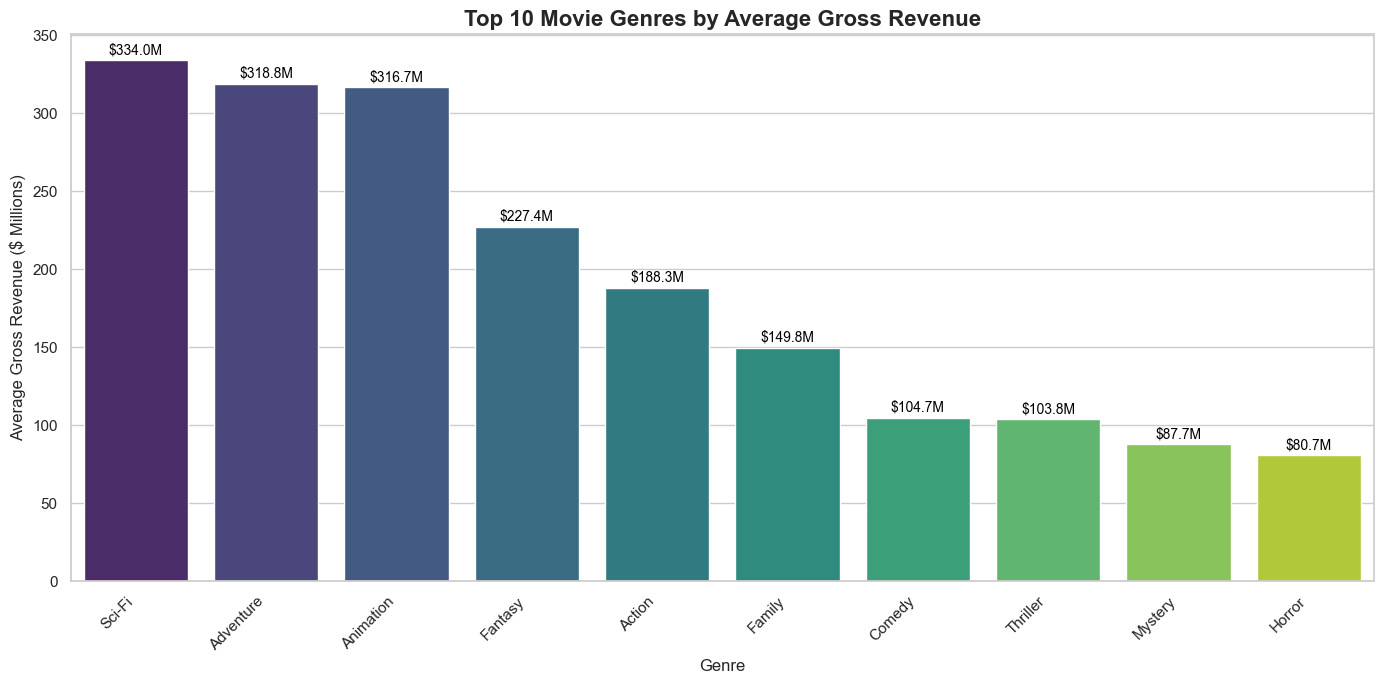

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x=top_genres.index,
    y=top_genres['avg_gross'] / 1e6,
    palette='viridis'
)

# Add labels on top of bars
for i, value in enumerate(top_genres['avg_gross'] / 1e6):
    ax.text(i, value + 2, f"${value:.1f}M", ha='center', va='bottom', fontsize=10, color='black')

# Titles and labels
plt.title('Top 10 Movie Genres by Average Gross Revenue', fontsize=16, fontweight='bold')
plt.ylabel('Average Gross Revenue ($ Millions)', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Improve layout
plt.tight_layout()
plt.show()

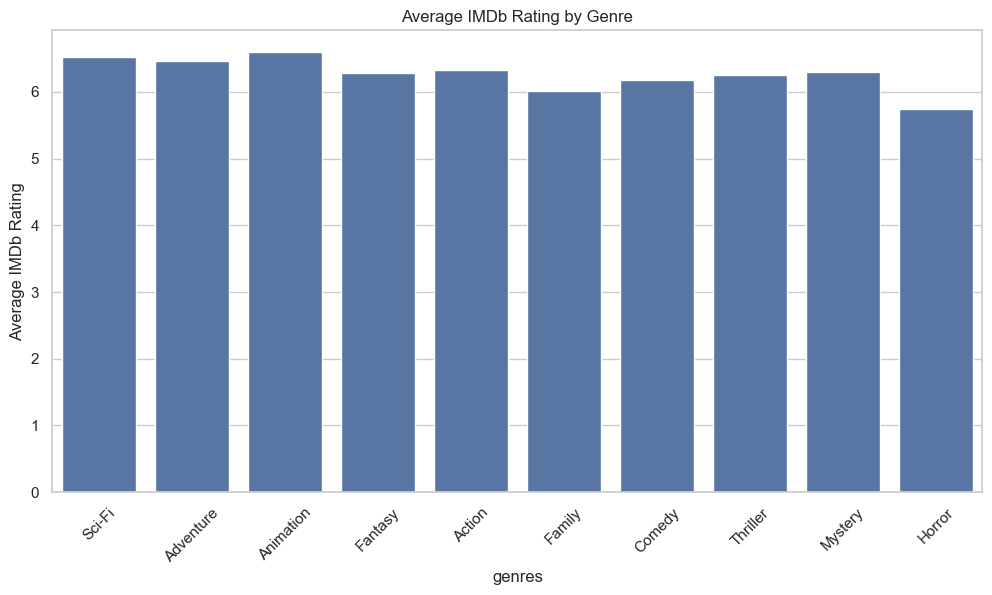

In [36]:
# Plot: Rating against genre
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.index, y=top_genres['avg_rating'])
plt.title('Average IMDb Rating by Genre')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.show()


 **Key Findings:**
1. Sci-Fi, Adventure & Animation genres generate the highest average revenue.
2. Sci-Fi genres achieve both high revenues and high IMDb ratings a good commercial and critical performance.
3. Animation also shows strong ratings and very high revenue a good genre for both family and general audience markets.


## 4.2 Studio Performance Analysis
### Goal:
This helps identify which studios consistently produce highly-rated films. Understanding studio performance is crucial for strategic partnerships, distribution planning, and benchmarking success.


### Method:
- Grouped the merged dataset by studio
- Calculated:
    - Average total gross revenue
    - Number of films per studio
    - Average IMDb rating
- Filtered to studios with atleast 5 movies
- Displayed top 10 studios by average revenue
- Visualized studio vs average revenue 

In [37]:
 # Filter out studios with very few movies (keep studios with at least 5 movies)
studio_stats = merged_data.groupby('studio').agg({
    'total_gross': ['mean', 'median', 'count'],
    'averagerating': 'mean'
}).sort_values(('total_gross', 'mean'), ascending=False)


In [38]:
# Filter for statistically significant studios
significant_studios = studio_stats[studio_stats[('total_gross', 'count')] >= 5]


In [39]:
# Take top 10 studios by average revenue
top_studios = significant_studios.head(10)

In [40]:
# Display the table
print("Top Performing Studios by Average Revenue:")
display(top_studios)

Top Performing Studios by Average Revenue:


total_gross                      averagerating
                  mean         median count          mean
studio                                                   
P/DW    507,650,000.00 524,950,000.00    10          6.76
BV      429,677,578.94 284,200,000.00    87          6.96
WB      243,446,517.53 128,200,000.00   114          6.64
Fox     232,381,765.79 167,800,000.00   117          6.36
WB (NL) 231,097,619.02 153,400,000.00    42          6.25
Sony    208,005,698.82 148,600,000.00    88          6.29
Par.    206,880,240.22 134,500,000.00    82          6.40
Uni.    206,819,603.06 129,650,000.00   128          6.26
Sum.    152,297,928.57  58,150,000.00    14          6.26
LG/S    132,269,257.11  88,700,000.00    35          6.45

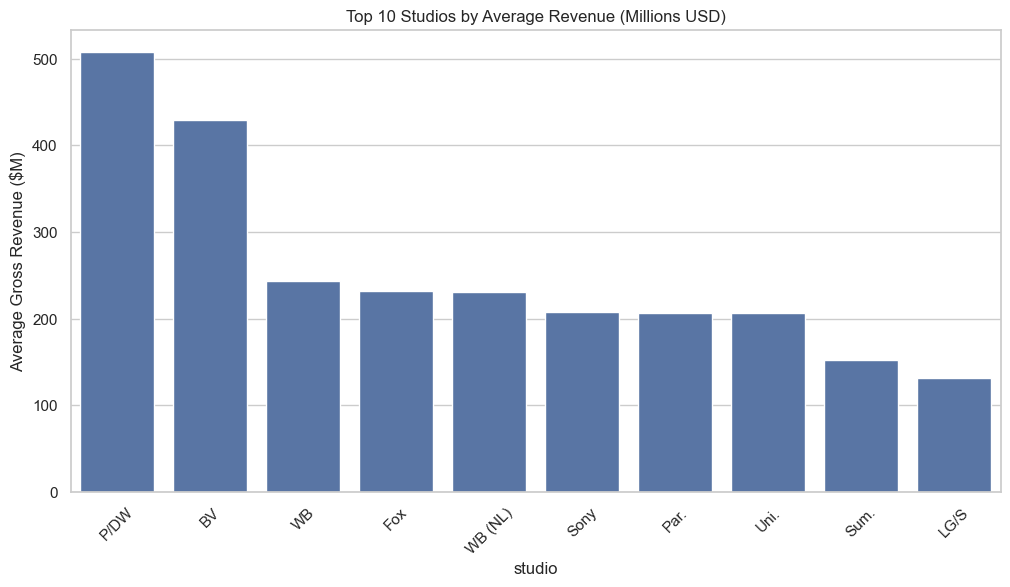

In [41]:
# Visualization: Studio vs. Revenue
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_studios.index,
    y=top_studios[('total_gross', 'mean')] / 1e6  # in millions
)
plt.title('Top 10 Studios by Average Revenue (Millions USD)')
plt.ylabel('Average Gross Revenue ($M)')
plt.xticks(rotation=45)
plt.show()


**Key Findings:**
1. The two studios P/DW and BV have the best average revenue which makes them the best candidates to partner with

## 4.3 Audience Preferences (Ratings vs. Revenue)
### Goal:
- Understand relationship between IMDb ratings and total revenue
- Identify which rating ranges are most commercially successful


### Method:
- Create rating tiers:
    - <5
    - 5-6
    - 6-7
    - 7-8
    - 8+
- Group data by rating tier and calculate:
    - Average revenue
    - Median revenue
    - Movie count per tier
    - Average rating
- Plot scatter of individual movie ratings vs. total gross
- Compute correlation between rating and revenue

In [42]:
# Create rating tiers
rating_data = merged_data.copy()
rating_data['rating_tier'] = pd.cut(
    rating_data['averagerating'],
    bins=[0,5,6,7,8,10],
    labels=['<5', '5-6', '6-7', '7-8', '8+']
)


In [43]:
# Group by rating tier
rating_group = rating_data.groupby('rating_tier').agg(
    avg_gross = ('total_gross', 'mean'),
    median_gross = ('total_gross', 'median'),
    movie_count = ('total_gross', 'count'),
    avg_rating = ('averagerating', 'mean')
)

C:\Users\USER\AppData\Local\Temp\ipykernel_9848\3501002883.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_group = rating_data.groupby('rating_tier').agg(


In [44]:
# Display rating tier performance
print("Performance by Rating Tier:")
display(rating_group)

Performance by Rating Tier:


,avg_gross,median_gross,movie_count,avg_rating
rating_tier,,,,
<5,"51,664,645.78","10,054,800.00",166,4.31
5-6,"69,682,462.00","19,699,999.00",445,5.62
6-7,"100,321,892.71","27,200,000.00",806,6.54
7-8,"156,611,780.27","30,800,000.00",499,7.45
8+,"233,741,376.66","49,000,000.00",57,8.27


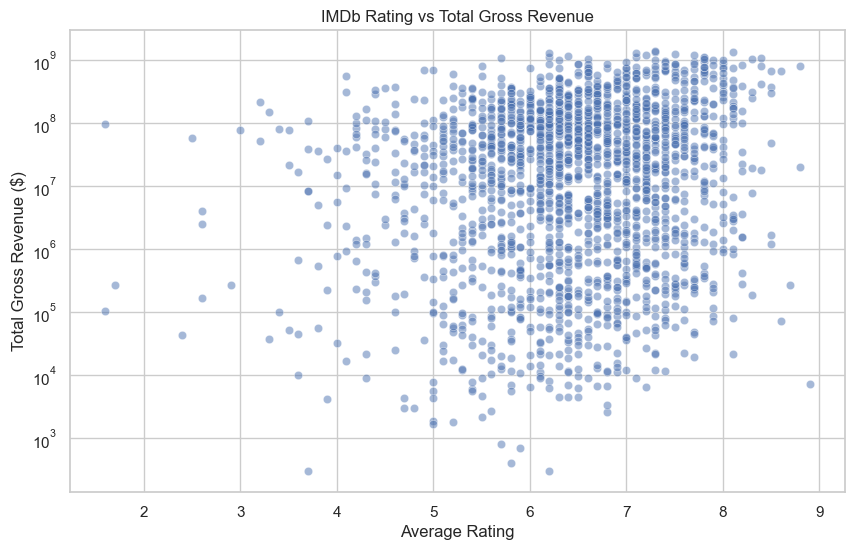

In [45]:
# Plot: IMDb Rating vs Revenue scatter
plt.figure(figsize=(10,6))
sns.scatterplot(x='averagerating', y='total_gross', data=rating_data, alpha=0.5)
plt.yscale('log')
plt.title('IMDb Rating vs Total Gross Revenue')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross Revenue ($)')
plt.show()


In [46]:
# Correlation
corr = rating_data['averagerating'].corr(rating_data['total_gross'])
print(f"Correlation between rating and revenue: {corr:.2f}")

Correlation between rating and revenue: 0.20


**Key Findings:**
1. Weak positive correlation (r=0.20) between ratings and revenue — higher ratings are slightly associated with higher revenue.
2. range 6-7 performs best commercially mass-appeal films that attract large audiences.
3. Blockbuster franchises perform well even with mid-range ratings.
4. Highest rated movies (>8) have more modest commercial performance.

### Correlation Analysis

This section investigates how numerical features in our dataset relate to each other. By using a heatmap of the correlation matrix, we can identify pairs of variables that are strongly or weakly correlated.

The heatmap displays Pearson correlation coefficients, which range from -1 (perfect negative correlation) to +1 (perfect positive correlation). This helps detect multicollinearity, which can affect model accuracy in regression.


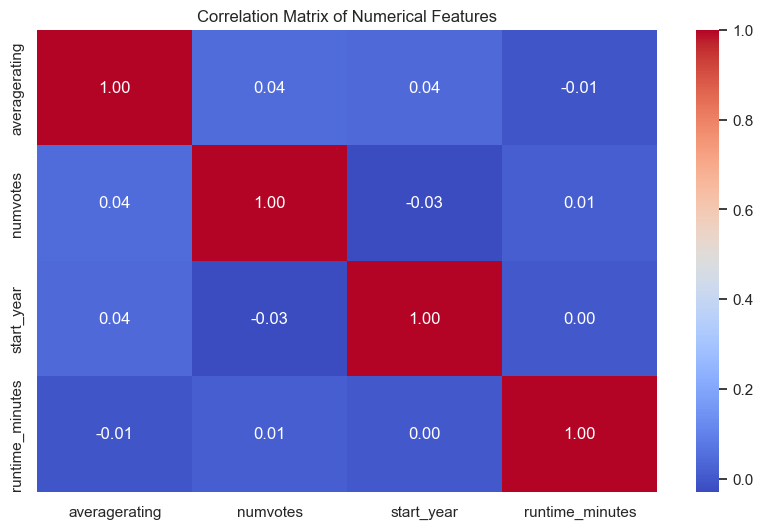

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_merged.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 4.4 ROI Analysis

## Goal:
 - Understand which genres and studios provide the best return on investment
 - Help the studio make financially sound production decisions

# Method:
 - Calculate ROI for each movie: (worldwide_gross - production_budget)/production_budget
 - Group by genre and studio to find average ROI
 - Visualize top performing genres/studios by ROI


In [48]:
# Load the cleaned movie budgets data
budget_data = pd.read_csv('data_folder/cleaned_movie_budgets.csv')


In [49]:
# Inspect column names before merging
print("Budget data columns:", budget_data.columns.tolist())
print("Merged data columns:", merged_data.columns.tolist())

Budget data columns: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_year', 'profit']
Merged data columns: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'studio', 'domestic_gross', 'foreign_gross', 'total_gross']


In [50]:
# Merge with our existing data to get genres and studios
roi_data = pd.merge(
    budget_data,
    merged_data,
    left_on=['movie', 'release_year'],
    right_on=['primary_title', 'start_year'],
    how='inner'
)


In [51]:
# Calculate ROI for each movie
roi_data['roi'] = (roi_data['worldwide_gross'] - roi_data['production_budget']) / roi_data['production_budget']


In [52]:
# Analysis by Genre (explode genres first like we did earlier)
roi_data['genres'] = roi_data['genres'].str.split(',')
roi_genre = roi_data.explode('genres')

In [53]:
# Calculate average ROI by genre (only for genres with at least 20 movies)
genre_roi = roi_genre.groupby('genres').agg(
    avg_roi=('roi', 'mean'),
    movie_count=('roi', 'count')
).query('movie_count >= 20').sort_values('avg_roi', ascending=False)

print("\\nTop Performing Genres by Average ROI:")
display(genre_roi.head(10))


\nTop Performing Genres by Average ROI:


,avg_roi,movie_count
genres,,
Horror,12.11,113
Mystery,11.88,87
Thriller,7.02,185
Music,3.34,35
Sci-Fi,3.16,97
Romance,3.08,145
Animation,3.07,87
Biography,2.84,106
Drama,2.76,520


In [54]:
# Analysis by Studio (only for studios with at least 20 movies)
studio_roi = roi_data.groupby('studio').agg(
    avg_roi=('roi', 'mean'),
    movie_count=('roi', 'count')
).query('movie_count >= 20').sort_values('avg_roi', ascending=False)

print("\\nTop Performing Studios by Average ROI:")
display(studio_roi.head(10))

\nTop Performing Studios by Average ROI:


,avg_roi,movie_count
studio,,
WB (NL),16.11,38
Par.,6.14,68
Uni.,4.89,116
Wein.,4.53,30
LG/S,3.33,27
FoxS,3.32,44
LGF,3.10,56
Fox,2.59,107
Sony,2.53,70


C:\Users\USER\AppData\Local\Temp\ipykernel_9848\711417477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_roi', y=top_genres.index, data=top_genres, palette='viridis')


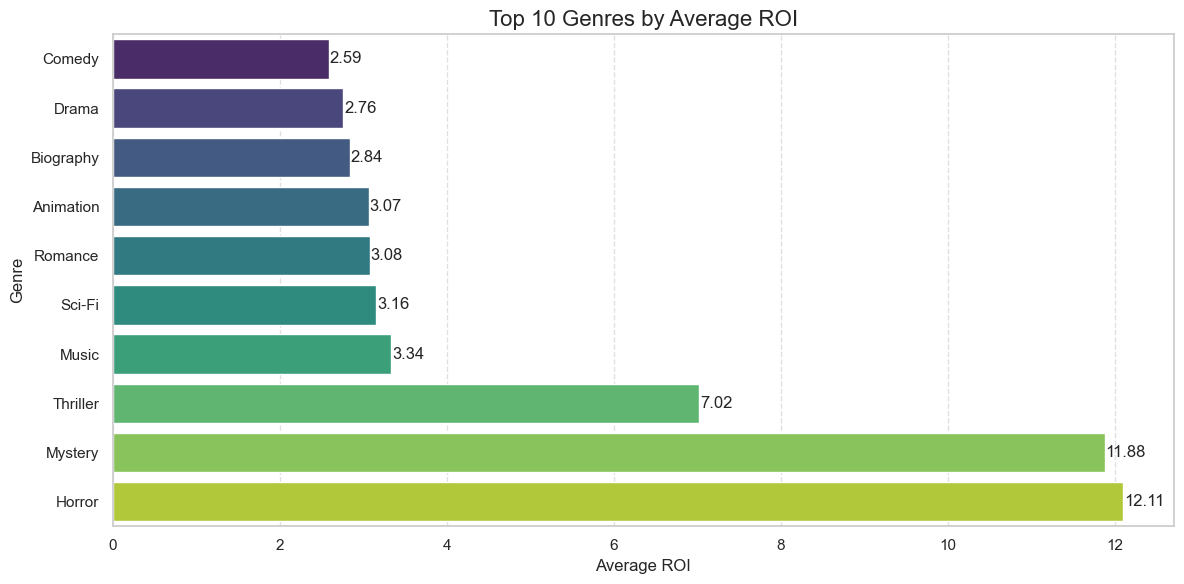

C:\Users\USER\AppData\Local\Temp\ipykernel_9848\711417477.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_roi', y=top_studios.index, data=top_studios, palette='magma')


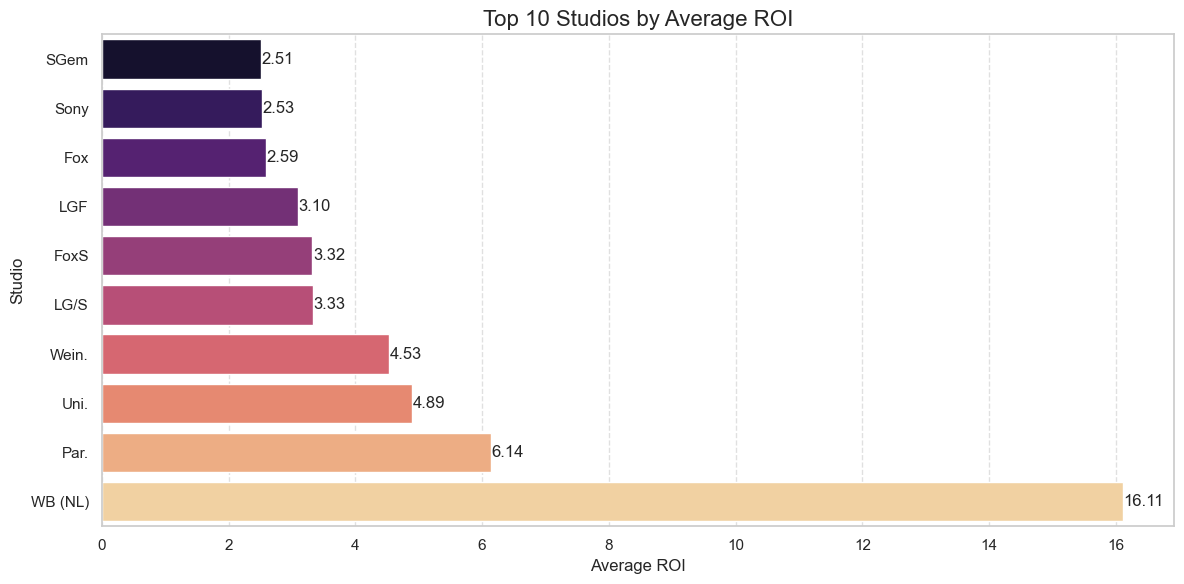

In [55]:
import matplotlib.ticker as mtick

#  Top Genres by ROI 
top_genres = genre_roi.head(10).sort_values('avg_roi', ascending=True)  # Sort for horizontal bars

plt.figure(figsize=(12, 6))
sns.barplot(x='avg_roi', y=top_genres.index, data=top_genres, palette='viridis')

# Add labels to bars
for index, value in enumerate(top_genres['avg_roi']):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.title('Top 10 Genres by Average ROI', fontsize=16)
plt.xlabel('Average ROI', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Top Studios by ROI
top_studios = studio_roi.head(10).sort_values('avg_roi', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='avg_roi', y=top_studios.index, data=top_studios, palette='magma')

for index, value in enumerate(top_studios['avg_roi']):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.title('Top 10 Studios by Average ROI', fontsize=16)
plt.xlabel('Average ROI', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## CONCLUSION
The analysis reveals:

1. Sci-Fi, Adventure, and Animation are the best genres for profitability and audience appeal.
2. Partnering with top-performing studios can enhance production quality and distribution.
3. Balancing revenue and ratings requires a mixed strategy—focusing on blockbusters for income and critically acclaimed projects for reputation.
4. The correlation matrix shows weak linear relationships between most numerical features, though vote count and runtime show minor interaction.
5. Genres with high ROI (e.g.Horror & Mystery) tend to deliver strong returns relative to budget. These genres are often low to mid-budget with broad audience appeal, making them smart investment targets.
6. Studios with high ROI(e.g., WB(NL)) demonstrate effective cost control and marketing strategies. Partnering with or emulating the production practices of these studios could enhance profitability

